#Auto MPG Analysis 

##Data Source
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [50]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd
import seaborn as sns
from io import StringIO
import requests
import json
%matplotlib inline

In [51]:
df = pd.read_csv('../data/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [52]:
#Number of records
len(df.index)

398

In [53]:
#Get types of fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [54]:
df.shape

(398, 9)

In [55]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [56]:
#Find blank or whitespace
df = df.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anythign null?
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<AxesSubplot:>

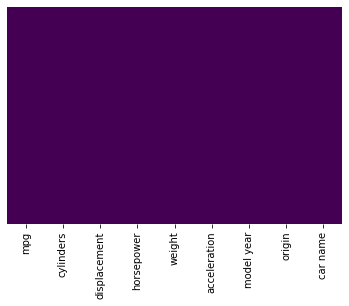

In [57]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [58]:
#How many unique values?
for column in df:
    print(column, len(df[column].unique()))

mpg 129
cylinders 5
displacement 82
horsepower 94
weight 351
acceleration 95
model year 13
origin 3
car name 305


In [46]:
#How many unique values?
for column in df:
    print(column, df[column].value_counts())

mpg 13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.5     1
19.1     1
33.8     1
28.1     1
31.8     1
Name: mpg, Length: 129, dtype: int64
cylinders 4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
displacement 97.0     21
350.0    18
98.0     18
318.0    17
250.0    17
         ..
83.0      1
181.0     1
81.0      1
96.0      1
144.0     1
Name: displacement, Length: 82, dtype: int64
horsepower 150    22
90     20
88     19
110    18
100    17
       ..
91      1
66      1
132     1
107     1
230     1
Name: horsepower, Length: 94, dtype: int64
weight 1985    4
2130    4
2720    3
2125    3
2300    3
       ..
3761    1
2223    1
2735    1
3245    1
2145    1
Name: weight, Length: 351, dtype: int64
acceleration 14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
12.1     1
24.6     1
19.9     1
20.7     1
18.3     1
Name: acceleration, Length: 95, dtype: int64
model year 73    40
78    36
76    34
82    31
75    30
70    2

ValueError: hist method requires numerical or datetime columns, nothing to plot.

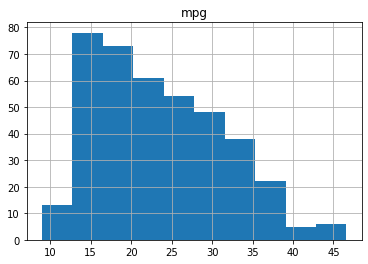

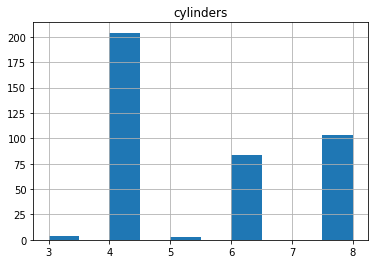

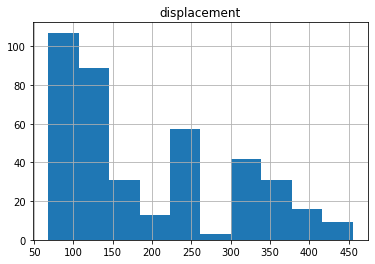

In [33]:
#Lets look at the ihstorgram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df:
    df.hist(column=col)

In [131]:
#Any duplictates?
df[df.duplicated()].sum()  

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: float64

In [37]:
#Split car name into make and model
labels=["make","model"]
mike = pd.DataFrame(df['car name'].apply(lambda x: x.split(' ', 1)).values.tolist(), columns=labels)
df = df.join(mike, lsuffix='_df', rsuffix='_mike')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make,model
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,torino


In [38]:
#Get Range
for col in df:
    print(col, df[col].min(), df[col].max())

mpg 9.0 46.6
cylinders 3 8
displacement 68.0 455.0
horsepower 100 ?
weight 1613 5140
acceleration 8.0 24.8
model year 70 82
origin 1 3
car name amc ambassador brougham vw rabbit custom
make amc vw


TypeError: '<=' not supported between instances of 'str' and 'float'

In [39]:
#Get Mean
for col in df:
    print(col, df[col].mean())

mpg 23.514572864321615
cylinders 5.454773869346734
displacement 193.42587939698493


TypeError: Could not convert 13016515015014019822021522519017016015022595959785884687909511390215200210193889095?1001051008810016517515315018017017511072100888690707665696070958054908616517515015315020815516019097150130140150112768769869297808817515014513715019815015815021522517510510010088954615016717018010088729490851079014523049759111215011012218095?100100678065751001101051401501501401508367785261757575979367951057272170145150148110105110951101101297583100789671979770909588981155386819279831401501201521001058190526070531007811095717075721021508810812018014513015068805896701451101451301101051009818017019014978887589638367789711011048665270601101401391059585881009010585110120145165139140689597759510585971031251151337168115858890110130129138135155142125150716580807712571907070656990115115907660706590889090789075927565105654848676767?676213210088?72848492110845864606765626863656574?7575100748076116120110105888588888885849092?746868637088757067676711085921129684908652847982 to numeric

In [166]:
#Get Median
for col in df:
    print(col, df[col].median())

('mpg', 22.75)
('cyl', 4.0)
('displ', 151.0)
('hp', 93.5)
('weight', 2803.5)
('accel', 15.5)
('yr', 191976.0)
('origin', 1.0)


TypeError: could not convert string to float: chevy s-10

In [162]:
#Get Mode
for col in df:
    print(col, mode(df[col]).mode[0])

('mpg', 13.0)
('cyl', 4)
('displ', 97.0)
('hp', 150)
('weight', 1985)
('accel', 14.5)
('yr', 191973.0)
('origin', 1.0)
('name', 'amc matador')
('make_df', 'ford')
('model_df', 'corolla')
('make_mike', 'ford')
('model_mike', 'corolla')
('make', 'ford')
('model', 'corolla')


In [169]:
#Calculate Variance
df.var()

mpg           60.918142
cyl            2.909696
displ      10950.367554
hp          1481.569393
weight    721484.709008
accel          7.611331
yr            13.569915
origin         0.648860
dtype: float64

In [40]:
#Calculate Standard devation
df.std()

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [41]:
#Values in the 50% quantile
df.quantile

<bound method DataFrame.quantile of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name       make            model  
0            70       1  chevr

In [42]:
#Calculate covariance
df.cov()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,61.089611,-10.308911,-655.402318,-5505.211745,9.058930,16.741163,3.532185
cylinders,-10.308911,2.893415,168.623214,1290.695575,-2.370842,-2.193499,-0.767477
displacement,-655.402318,168.623214,10872.199152,82368.423240,-156.332976,-142.717137,-50.964989
weight,-5505.211745,1290.695575,82368.423240,717140.990526,-974.899011,-959.946344,-394.639330
acceleration,9.058930,-2.370842,-156.332976,-974.899011,7.604848,2.938105,0.455354
model year,16.741163,-2.193499,-142.717137,-959.946344,2.938105,13.672443,0.535790
origin,3.532185,-0.767477,-50.964989,-394.639330,0.455354,0.535790,0.643292


In [43]:
#Calculate correlation
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


C:\Users\MICHAELGILDEIN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\MICHAELGILDEIN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


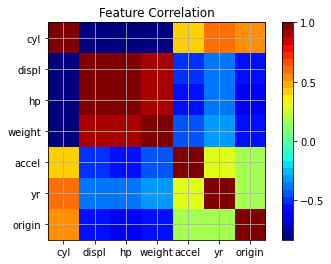

In [44]:
#Visualize correlation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['mpg','cyl','displ','hp','weight','accel','yr','origin']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    fig.colorbar(cax, ticks=[-1,-.5,0,.5,1])
    plt.show()

correlation_matrix(df)

<AxesSubplot:>

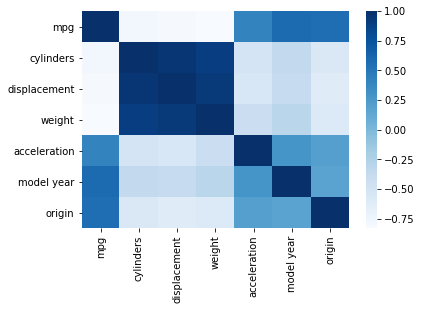

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

<AxesSubplot:>

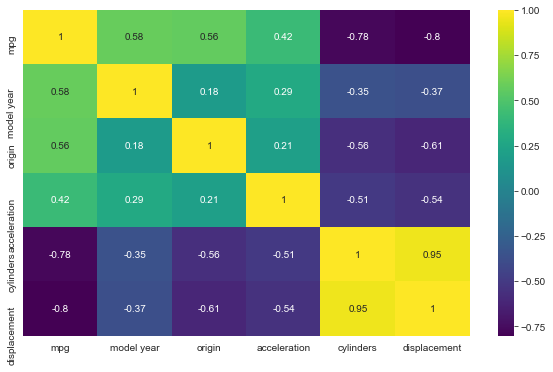

In [63]:
#Quality correlation matrix
k = 6 #number of variables for heatmap
cols = df.corr().nlargest(k, 'mpg')['mpg'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

C:\Users\MICHAELGILDEIN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MICHAELGILDEIN\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MICHAELGILDEIN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MICHAELGILDEIN\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` speci

TypeError: Horizontal orientation requires numeric `x` variable.

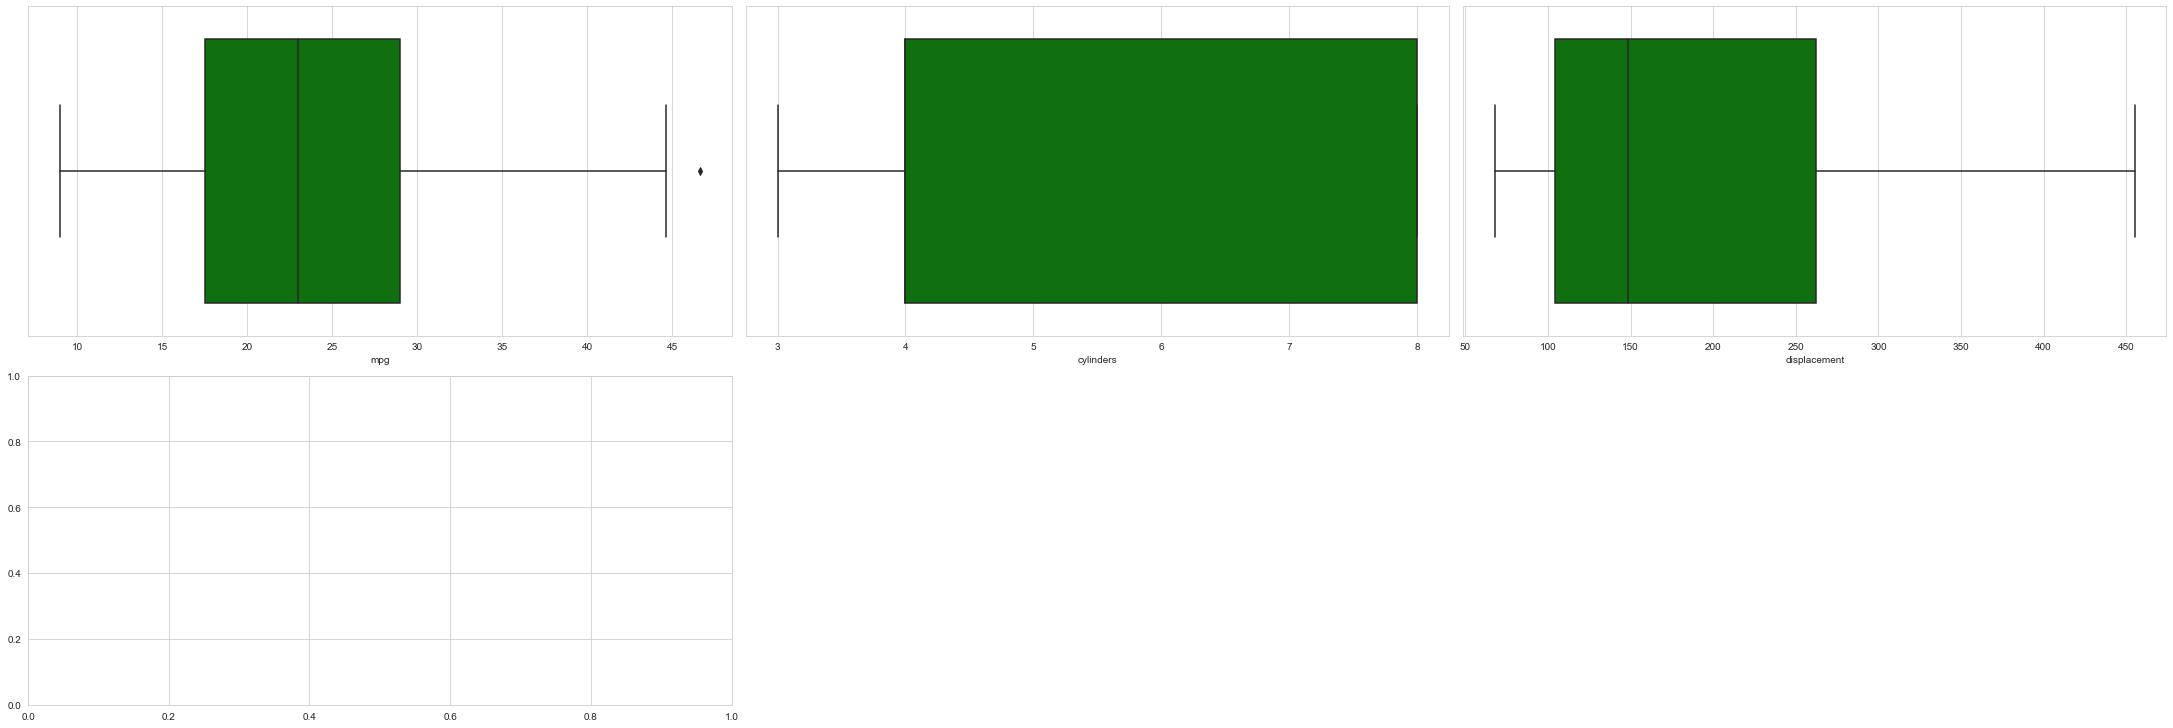

In [67]:
l = df.columns.values
number_of_columns=3
number_of_rows = 1
plt.figure(figsize=(10*number_of_columns,10*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

C:\Users\MICHAELGILDEIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MICHAELGILDEIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MICHAELGILDEIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

ValueError: could not convert string to float: '?'

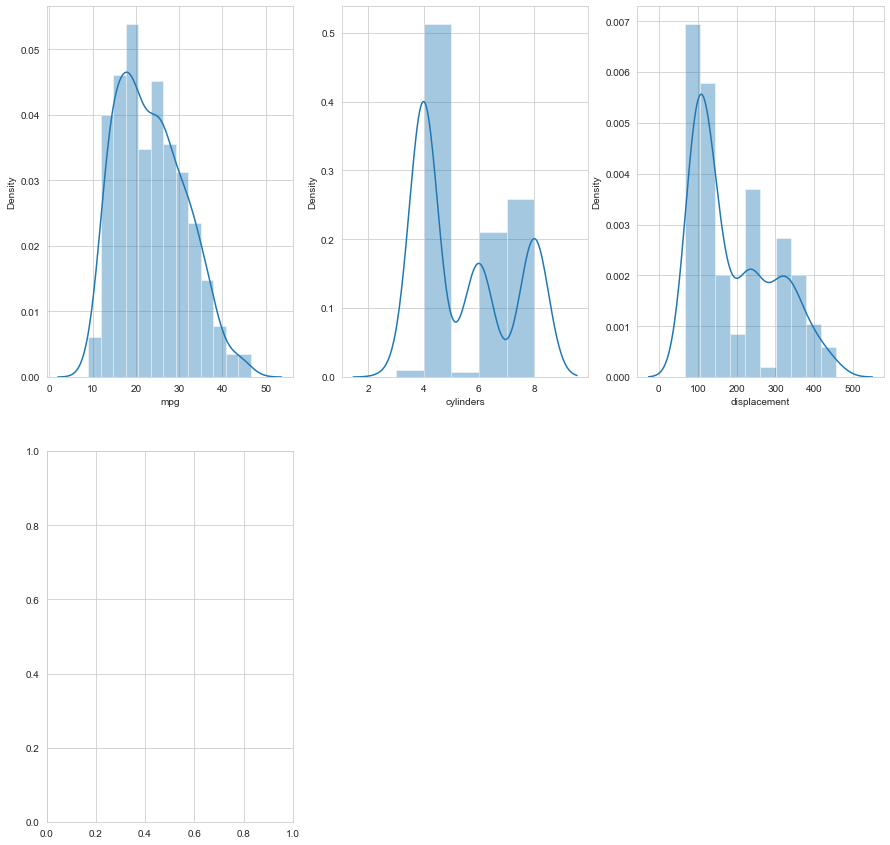

In [69]:
plt.figure(figsize=(5*number_of_columns,15*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 